source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook


In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filename1 = 'dataframe.csv'
filename2 = 'dataframe_all_timestamps.csv'

df = pd.read_csv('dataframe.csv')
df_all_timestamps = pd.read_csv('dataframe_all_timestamps.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 19 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [4]:
df_all_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356350 entries, 0 to 356349
Data columns (total 19 columns):
video_id                  356350 non-null object
trending_date             356350 non-null object
title                     356350 non-null object
channel_title             356350 non-null object
category_id               356350 non-null int64
category                  356350 non-null object
publish_date              356350 non-null object
publish_time              356350 non-null object
tags                      356350 non-null object
views                     356350 non-null int64
likes                     356350 non-null int64
dislikes                  356350 non-null int64
comment_count             356350 non-null int64
thumbnail_link            356350 non-null object
comments_disabled         356350 non-null bool
ratings_disabled          356350 non-null bool
video_error_or_removed    356350 non-null bool
description               356350 non-null object
country           

In [5]:
df_all_timestamps.head(8)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR
2,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR
3,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR
4,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR
5,JzCsM1vtn78,2017-11-14,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,Entertainment,2017-11-12,20:19:24,"logan paul vlog""|""logan paul""|""logan""|""paul""|""...",4477587,292838,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...,FR
6,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR
7,k0OruM7tneA,2017-11-14,الإعلام المصري : شكون فالمنتخبات العربية لي ...,AR-EN-FR LANGUAGES,17,Sports,2017-11-13,12:08:26,"المنتخب""|""المغربي""|""دخل""|""التاريخ""|""وهو""|""أول""...",48650,486,69,238,https://i.ytimg.com/vi/k0OruM7tneA/default.jpg,False,False,False,الإعلام المصري : شكون فالمنتخبات العربية لي غ...,FR


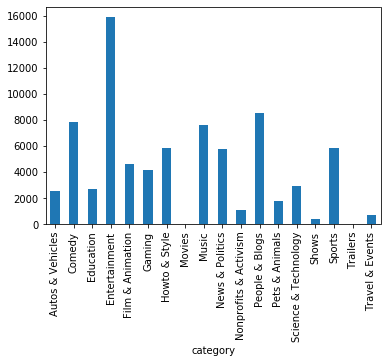

In [6]:

df.groupby('category')['likes'].nunique().plot(kind='bar')
plt.show()

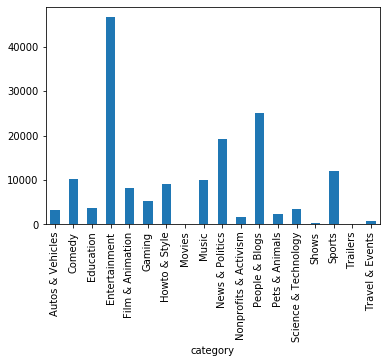

In [7]:
df.groupby('category')['views'].nunique().plot(kind='bar')
plt.show()

In [8]:
df.loc[df['category'] == 'Entertainment']

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
8,_wChN4yabJM,2017-11-14,DALS S08 - Lenni-Kim danse un Tango avec Denit...,Danse avec les stars,24,Entertainment,2017-11-13,12:00:02,"Lenni-Kim""|""Denitsa Ikonomova""|""tango""|""Justin...",19004,618,4,44,https://i.ytimg.com/vi/_wChN4yabJM/default.jpg,False,False,False,"Pour la soirée du Switch, le public a décidé d...",FR
10,hWtTJ3Q37rY,2017-11-14,MAGIE - IL FAIT APPARAÏTRE UN AVION DEVANT 230...,Cyril Ayrau,24,Entertainment,2017-11-13,05:54:40,"CYRIL AYRAU""|""Magicien Bergerac""|""Apparition a...",5114,34,1,11,https://i.ytimg.com/vi/hWtTJ3Q37rY/default.jpg,False,False,False,Cyril Ayrau Le Magicien de Bergerac fait appar...,FR
14,O7JJllvepts,2017-11-14,Michel Sardou : Les révélations inédit de Loua...,koi de neuf? Buzz,24,Entertainment,2017-11-13,00:04:15,"Michel Sardou""|""Louane Emera""|""Je vole",7709,15,7,6,https://i.ytimg.com/vi/O7JJllvepts/default.jpg,False,False,False,Michel Sardou tacle Louane Emera : Elle dit de...,FR
17,mAbw28ePp5c,2017-11-14,LES 5 MEILLEURS MAGICIENS DU MONDE PASSÉ SUR I...,HEROZ,24,Entertainment,2017-11-11,17:37:29,"HEROZ""|""LES 5 MEILLEURS MAGICIENS DU MONDE PAS...",50733,960,75,129,https://i.ytimg.com/vi/mAbw28ePp5c/default.jpg,False,False,False,top 10 magie magie facile magique filmé en dir...,FR
22,ondy6jke_SQ,2017-11-14,LES DILEMMES EN LIVE ! (REDIFFUSION),Les dilemmes,24,Entertainment,2017-11-12,20:23:08,"tu""|""préfères""|""les""|""dilemme""|""plus""|""diffici...",43674,1556,79,322,https://i.ytimg.com/vi/ondy6jke_SQ/default.jpg,False,False,False,Saurez-vous faire face aux choix les plus diff...,FR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171134,Gn1s5k5DVlE,2018-06-14,Șoc! Fernando și Ciobi au fost eliminați de la...,Chefi la cuțite,24,Entertainment,2018-06-12,20:12:50,"fernando|""ciobi""|""eliminati""|""Chefi la cutite""...",120438,945,416,594,https://i.ytimg.com/vi/Gn1s5k5DVlE/default.jpg,False,False,False,Șoc! Fernando și Ciobi au fost eliminați de la...,DE
171139,VdOGUFr3glA,2018-06-14,لحظة تتويج ملف التلاتي بكأس العالم 2026 -خسارة...,Sahifa-Tv قناة الصحيفة,24,Entertainment,2018-06-13,11:00:10,[none],429897,1915,1021,1635,https://i.ytimg.com/vi/VdOGUFr3glA/default.jpg,False,False,False,🛑Télécharge Onefootball maintenant : https://...,DE
171140,mSJ_Qb9-WtA,2018-06-14,Simon Cowell Falls In LOVE With 'Ms. Trysh' Bu...,Talent Recap,24,Entertainment,2018-06-13,01:36:56,"America’s got talent|""Americas got talent""|""ag...",560827,8688,147,696,https://i.ytimg.com/vi/mSJ_Qb9-WtA/default.jpg,False,False,False,#Full Segment | America’s Got Talent Season 13...,DE
171142,c5ZB0p0zBg0,2018-06-14,வாணி ராணி - VAANI RANI - Episode 1593 - 13/6/...,RadaanMedia,24,Entertainment,2018-06-13,16:30:00,"Vaani rani|""rani""|""Radhika in funny character""...",341799,2197,329,267,https://i.ytimg.com/vi/c5ZB0p0zBg0/default.jpg,False,False,False,Subscribers Link: http://bit.ly/2qb69dZConnect...,DE


In [9]:
import numpy as np
df.groupby(['category'])['comment_count'].agg(np.std)

category
Autos & Vehicles          1852.127815
Comedy                    7372.879592
Education                 2312.752695
Entertainment             6754.566807
Film & Animation          3331.228222
Gaming                    7528.895564
Howto & Style             6377.825447
Movies                    1279.640989
Music                    20324.843984
News & Politics           2116.460050
Nonprofits & Activism    17984.867573
People & Blogs            5020.163820
Pets & Animals            2422.753436
Science & Technology     17802.363904
Shows                     1434.721723
Sports                    2312.535065
Trailers                     0.577350
Travel & Events           1396.303687
Name: comment_count, dtype: float64

In [14]:
counts = df['country'].value_counts()
counts

RU    30783
MX    27900
FR    24085
DE    22965
CA    17338
IN    15222
KR    13793
JP    10808
US     5185
GB     3070
Name: country, dtype: int64

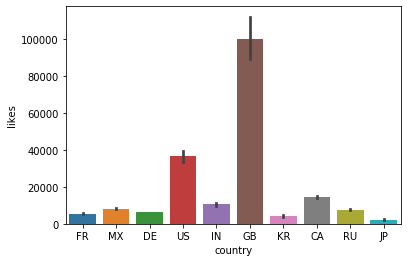

In [16]:
ax = sns.barplot(x= 'country', y='likes', data= df)

In [17]:
df.loc[df['country'] == 'GB']

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
432,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,News & Politics,2017-11-13,01:45:13,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB
433,AumaWl0TNBo,2017-11-14,How My Relationship Started!,PointlessBlogVlogs,24,Entertainment,2017-11-11,17:00:00,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,► HOW MY RELATIONSHIP STARTED!\n► PB Merch • h...,GB
434,-N5eucPMTTc,2017-11-14,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,People & Blogs,2017-11-10,19:19:43,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...,GB
436,fiusxyygqGk,2017-11-14,Marshmello - You & Me (Official Music Video),marshmello,10,Music,2017-11-10,15:00:03,"selena gomez wolves|""alone marshmello""|""marshm...",3407008,207262,3167,13279,https://i.ytimg.com/vi/fiusxyygqGk/default.jpg,False,False,False,PURCHASE YOU & ME HERE ▶ https://smarturl.it/m...,GB
466,mCx26FLXWuI,2017-11-14,Seth Rollins & Dean Ambrose vs. Cesaro & Sheam...,WWE,17,Sports,2017-11-07,04:52:25,"wwe|""world wrestling entertainment""|""wrestling...",1689382,24186,3330,3414,https://i.ytimg.com/vi/mCx26FLXWuI/default.jpg,False,False,False,In a main event with enormous Survivor Series ...,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170148,oTn329CjrRA,2018-06-14,LeBron James and Draymond Green Face Off in NB...,UNINTERRUPTED,17,Sports,2018-06-11,17:28:35,"UNINTERRUPTED|""lebron james""|""cleveland cavali...",129026,1638,29,275,https://i.ytimg.com/vi/oTn329CjrRA/default.jpg,False,False,False,The Cavs and Warriors stars' routines for the ...,GB
170149,VhQmTmqcEY0,2018-06-14,Juanes - Pa Dentro,JuanesVEVO,10,Music,2018-06-01,02:00:01,"Juanes|""Pa""|""Dentro""|""Universal""|""Music""|""Lati...",21853809,78212,5701,4780,https://i.ytimg.com/vi/VhQmTmqcEY0/default.jpg,False,False,False,Music video by Juanes performing Pa Dentro. © ...,GB
170150,ek1ePFp-nBI,2018-06-14,Halloween - Official Trailer (HD),Universal Pictures,24,Entertainment,2018-06-08,14:00:03,"halloween|""horror""|""horror movie""|""scary movie...",12955997,200539,7647,35147,https://i.ytimg.com/vi/ek1ePFp-nBI/default.jpg,False,False,False,"This October, Michael Myers returns. Watch the...",GB
170151,QRyzwPzxpcs,2018-06-14,Sea of Thieves - E3 2018 - Cursed Sails and Fo...,Xbox,20,Gaming,2018-06-10,20:29:46,"Xbox|""Xbox360""|""xbox 360""|""Xbox One""|""Rare""|""S...",1152245,2810,247,520,https://i.ytimg.com/vi/QRyzwPzxpcs/default.jpg,False,False,False,Sea of Thieves' world continues to evolve in t...,GB


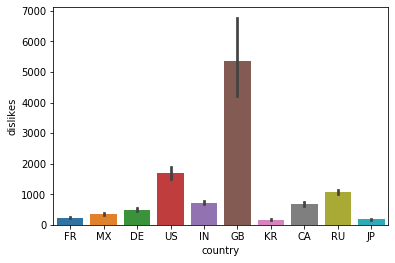

In [18]:
ax = sns.barplot(x= 'country', y= 'dislikes', data= df)

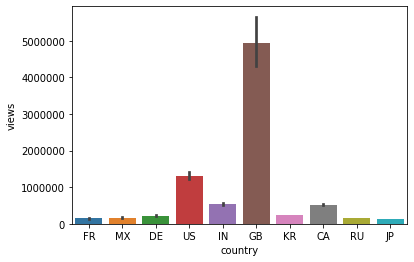

In [19]:
ax = sns.barplot(x= 'country', y='views', data= df)

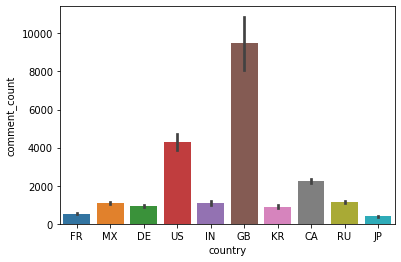

In [20]:
ax = sns.barplot(x= 'country', y='comment_count', data= df)